CMP5367

# Objectives
In this lab you will be detting started with neural networks for Classification and regression. You will learn the following:
* Classifying movie reviews as positive or negative (binary classification).
* Classifying news wires by topic (multiclass classification).
* Estimating the price of a house, given real-estate data (scalar regression).

# **Part I: Example of a training a neural network**

## Classifying movie reviews: A binary classification example

### The IMDB dataset
You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.
Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, <mark>where each integer stands for a specific word in a dictionary</mark>.
This enables us to focus on model building, training, and evaluation.

The following code will load the dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

ModuleNotFoundError: No module named 'tensorflow'

The argument `num_words=10000` means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
us to work with vector data of manageable size. If we didn’t set this limit, we’d be working
with 88,585 unique words in the training data, which is unnecessarily large. Many
of these words only occur in a single sample, and thus can’t be meaningfully used for
classification.

The variables `train_data` and `test_data` are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

Because we’re restricting ourselves to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [ ]:

max([max(sequence) for sequence in train_data])

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()  #word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #Reverses it,mapping integer indices
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) #Decodes the review.

In [ ]:
#check the first review in your train_data
decoded_review

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

You can’t directly feed lists of integers into a neural network. They all have different
lengths, but a neural network expects to process contiguous batches of data with same length.

**Multi-hot encode** your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 8 and 5, which would be 1s. Then you
could use a Dense layer, capable of handling floating-point vector data, as the
first layer in your model. This are other ways to encode the data but we will try this one for clarity:

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #Creates an all-zero matrix of shape (len(sequences),dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #Sets specific indices of results[i] to 1s
    return results
    #Vectorized training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# **Question 1**

**What do we mean by a one-hot encoding vector? Give an example?**

Give your answer here:



Here’s what the samples look like now:

In [ ]:
x_train[0]

You should also vectorize your labels, which is straightforward:

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Now the data is ready to be fed into a neural network.

### Building your model

**Model definition**

The input data is vectors, and the labels are scalars **(1s and 0s)**: this is one of the simplest
problem setups you’ll ever encounter.

 A type of model that performs well on such a problem is a plain stack of densely connected (Dense) layers with **relu** activations (<mark>remember what the Relu function does?</mark>). A dense (or fully connected) layer is one where each neuron is connected to every neuron in the previous layer

There are two key architecture decisions to be made about such a stack of Dense
layers:


1.   How many layers to use.
2.   How many units to choose for each layer (units in a dense layer refer to the number of neurons)

 We will choose:
* Two intermediate layers with 16 units each
* A third layer that will output the scalar prediction
regarding the sentiment of the current
review

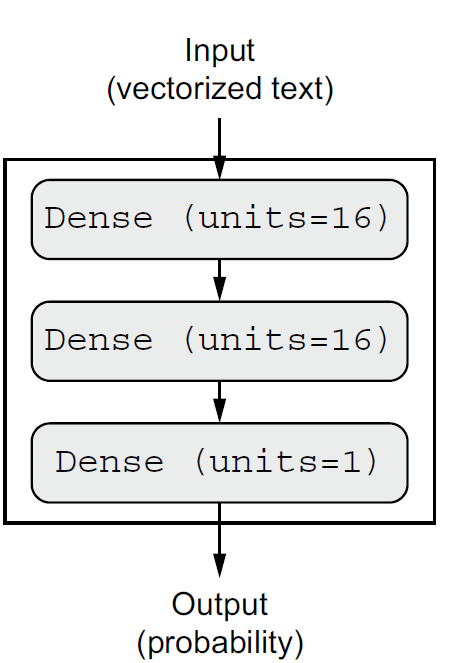

# **Question 2**

What does the Relu function do to a real number?

Give your answer here:



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #will give me a probablity of whether the sentiment is 1 or 0
])

The sigmoid function in the last layer of a neural network is commonly used for **binary classification tasks**. <mark>It maps the output of the layer to a value between 0 and 1, making it ideal for predicting probabilities.

**Example Use:**
In our binary classification model predicting whether a review is positive (1) or negtative (0), the last layer might have a single neuron with a sigmoid activation. If the output is 0.9, it suggests a 90% probability that the review is positive.

In summary, using the sigmoid function in the last layer ensures the output can be interpreted as a probability for binary classification tasks.

**Compiling the model**

Finally, you need to choose a loss function and an optimizer. An optimizer is the algorithm or method used to update the weights and biases of the model during training to minimize the loss function. The primary function of the optimizer is to adjust these parameters iteratively to help the model learn and make better predictions.Types of Optimizers **(Stochastic Gradient Descent (SGD)**,**Adam (Adaptive Moment Estimation)**,** RMSProp**)

**How It Works:**

**Step 1:** Calculate the loss using the current model predictions.

**Step 2:** Compute the gradients of the loss with respect to each parameter.

**Step 3:** Update the model parameters in the opposite direction of the gradients, scaled by a factor
called the learning rate.

**Step 4**: Repeat this process for multiple iterations (epochs) until the loss is minimized.

<mark>Check the lecture for detailed explanation of the gradient.



Because you’re facing a
binary classification problem and the output of your model is a probability (you end
your model with a single-unit layer with a sigmoid activation), it’s best to use the
`binary_crossentropy` loss. It isn’t the only viable choice: for instance, you could use
mean_squared_error. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of information
theory that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions.
As for the choice of the optimizer, we’ll go with **rmsprop**, which is a usually a good
default choice for virtually any problem.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

A deep learning model should never be evaluated on its
training data—it’s standard practice to use a **validation set** to monitor the accuracy of
the model during training. Here, we’ll create a validation set by setting apart 10,000
samples from the original training data.

In [ ]:
x_val = x_train[:10000]  # validation set
partial_x_train = x_train[10000:] # training set
y_val = y_train[:10000] #validation labels
partial_y_train = y_train[10000:] # training labels

# **What is the purpose of a validation set?**

**Training your model**

We will now train the model for 20 **epochs** (**20 iterations over all samples in the training
data**) in mini-batches of 512 samples. At the same time, we will monitor loss and
accuracy on the 10,000 samples that we set apart. We do so by passing the validation
data as the validation_data argument.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
#the call to model.fit() returns a History object.This object has a member history, which is a dictionary containing data about everything that happened during training.
history_dict = history.history
history_dict.keys()

**Plotting the training and validation loss**

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") #"bo" is for "blue dot."
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #"b" is for "solid blue line."
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

In [ ]:
plt.clf() #Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As you can see, the training loss **decreases** with every epoch, and the training accuracy
**increases** with every epoch. That’s what you would expect when running **gradientdescent**
optimization—the quantity (loss) you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of **overfitting**: a
model that performs better on the training data isn’t necessarily a model that will
do better on data it has never seen before.

In precise terms, what you’re seeing is
**overfitting**: after the fourth epoch, you’re overoptimizing on the training data, and you
end up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.
In this case, to prevent overfitting, you could stop training after four epochs. In
general, you can use a range of techniques to mitigate overfitting.

# **Quesiton 3**

**Why we do we say that the model is overfitting after epoch 4?**

Give your answer here:




**Retraining a model from scratch**

Let’s train a new model from scratch for four epochs only as we noticed it overfits after than. We will use the whole train dataset and then evaluate it on the
test data.

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
#The first number is the test loss, and the second number  is the test accuracy.
results

### Using a trained model to generate predictions on new data

After having trained a model, you’ll want to use it in a practical setting. You can generate
the likelihood of reviews being positive by using the predict method

In [ ]:
y_pred_prob= model.predict(x_test)

Create a confusion matrix for the model on the test set.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict on the test set
y_pred_prob= model.predict(x_test) # Replace 'model' and 'X_test' with your variables

# Step 2: Convert probabilities to binary class labels (threshold = 0.5)
y_pred_classes = (y_pred_prob > 0.5).astype(int)

# Step 3: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)  #  'y_test' are the true labels

# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Print a classification report
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))


# **Question 4**

Explain the confusion metric and the confustion metric report in detail:




# **Further experiments**

Further experiments
The following experiments will help convince you that the architecture choices you’ve
made are all fairly reasonable, although there’s still room for improvement:
You used two representation layers before the final classification layer.



1.   Try using one or three representation layers, and see how doing so affects validation and
test accuracy.
2.   Try using layers with more units or fewer units: 32 units, 64 units.
3.   Try using the `mse` loss function instead of `binary_crossentropy`.

Report your results here:



### Wrapping up

Here’s what you should take away from this example:

*  You usually need to do quite a bit of preprocessing on your raw data in order to
be able to feed it—as tensors—into a neural network.
* Sequences of words can be encoded as binary vectors, but there are other encoding options too.

* Stacks of Dense layers with **relu** activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.

* In a binary classification problem (two output classes), your model should end
with a Dense layer with one unit and a sigmoid activation: the output of your
model should be a scalar between 0 and 1, encoding a probability.

* With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is `binary_crossentropy`.

* The rmsprop optimizer is generally a good enough choice, whatever your problem.

* As they get better on their training data, neural networks eventually start overfitting
and end up obtaining increasingly worse results on data they’ve never
seen before. Be sure to always monitor performance on data that is outside of
the training set.

# **PART 2: Train a deep neural network by yourself**

## Classifying newswires: A multiclass classification example

### The Reuters dataset
You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.
Like IMDB, the Reuters dataset comes packaged as part of Keras.

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
train_labels

In [ ]:
# get the length of the train_data

In [ ]:
# get the length of the test_data

In [ ]:
# check one example of the train data

In [ ]:
# check one example of the labels in the train data

### Preparing the data

**Encoding the input data**

In [ ]:
# vectorise the x_train and x_test as we did with the IMDP reviews

### Sample answer

<details><summary>Click here for the solution</summary>



```
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
```



**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras:

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

It is same way we build the previous model for IMDP reviews. However, the number of output classes in the Reuters topics has gone from 2 to 46. The
dimensionality of the output space is much larger.
In a stack of Dense layers like those we’ve been using, each layer can only access
information present in the output of the previous layer. If one layer drops some
information relevant to the classification problem, this information can never be
recovered by later layers: each layer can potentially become an information bottleneck.
In the previous example, we used **16-dimensional** intermediate layers, but a
16-dimensional space may be too limited to learn to separate 46 different classes:
such small layers may act as information bottlenecks, permanently dropping relevant
information.

For this reason we’ll use larger layers. Let’s go with **64 units**.

**Model definition**

Build your model with** three dense layers** with the first two having **64 units** and the **last layer 46 units**. The 46 units reflect the 46 topics (classes) we are predicting.

Use the **"relu"** function for the first two layers.

Use the **"softmax"** function for the last layer.


<mark>Note:</mark>

The last layer uses a softmax activation which is suitable for multiclass classification. It means the model will output a probability distribution over the 46 different
output classes — for every input sample, the model will produce a 46-dimensional output
vector, where output[i] is the probability that the sample belongs to class i. The
46 scores will sum to 1. The highest probablity is the predicted Reuters topic for each sample.

### Sample answer

<details><summary>Click here for the solution</summary>



```
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
```

**Compile the model**

Note:

The best loss function to use in multilabel classification is `categorical_crossentropy`. It measures
the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels.

 By minimizing the distance between these two distributions, you train the model to output something
as close as possible to the true labels.

### Sample answer

<details><summary>Click here for the solution</summary>



```
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
```

### Validating your approach

**Setting aside a validation set**

Set apart 1,000 samples in the training data to use as a validation set.

### Sample answer

<details><summary>Click here for the solution</summary>



```
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
```

**Train the model for 20 epochs**

### Sample answer

<details><summary>Click here for the solution</summary>



```
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
```

**Plot the training and validation loss**

### Sample answer

<details><summary>Click here for the solution</summary>



```
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
```

**Plotting the training and validation accuracy**

### Sample answer

<details><summary>Click here for the solution</summary>



```
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
```

# When does the model overfit? Write your answer here:

**Retraining a model from scratch**

### Sample answer

<details><summary>Click here for the solution</summary>



```
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
```

In [ ]:
results

# Explain the resutls

### Generating predictions on new data

### Sample answer

<details><summary>Click here for the solution</summary>



```
predictions = model.predict(x_test)
```

In [ ]:
# Step 5: Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 6: Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

# Step 7: Display the confusion matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Reuters Dataset')
plt.show()

# Step 8: Print the classification report
print(classification_report(test_labels, y_pred_classes))

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

### Further experiments

### **HOME WORK**:

Run the following code for a regression task trained by a neural network

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

## Give your summary here of the whole experiment: